# **Name: Akash SakthiMurugan**
# *Course: Data Analytics and Visualization*
# *Roll no.: 3122225002112*
# ***Sec: IT-C***

# Data Analysis - Outlier detection and frequency distribution

****Dataset used : Housing dataset****

In [ ]:
#Importing the necessary libraries for dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = pd.read_csv('housing.csv')

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [11]:
# Handle missing values for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [12]:
numeric_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [13]:
df[numeric_cols]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [14]:
# Identify object columns
object_cols = df.select_dtypes(include=['object']).columns
print(f'Object columns: {object_cols}')

Object columns: Index(['ocean_proximity'], dtype='object')


In [15]:
for col in object_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [16]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity       float64
dtype: object


In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NaN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NaN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NaN
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NaN
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NaN


In [18]:
df['ocean_proximity'] = df['ocean_proximity'].fillna(0)

In [19]:
print(df.dtypes)
df.head()

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity       float64
dtype: object


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0


In [20]:
print(f'Shape of the dataset: {df.shape}')
print(f'Data types:\n{df.dtypes}')
print(f'Descriptive statistics:\n{df.describe()}')

    # Check for missing values
print(f'Missing values:\n{df.isnull().sum()}')

    # Handle missing values for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

Shape of the dataset: (20640, 10)
Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity       float64
dtype: object
Descriptive statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.0

In [21]:
for column in numeric_cols:
        data = df[column].dropna()
        mean = np.mean(data)
        median = np.median(data)
        std_dev = np.std(data)
        quartiles = np.percentile(data, [25, 50, 75])

        print(f'Feature: {column}')
        print(f'Mean: {mean}')
        print(f'Median: {median}')
        print(f'Standard Deviation: {std_dev}')
        print(f'Quartiles: {quartiles}')
        print()


Feature: longitude
Mean: -119.56970445736432
Median: -118.49
Standard Deviation: 2.003483187746976
Quartiles: [-121.8  -118.49 -118.01]

Feature: latitude
Mean: 35.63186143410853
Median: 34.26
Standard Deviation: 2.135900653797483
Quartiles: [33.93 34.26 37.71]

Feature: housing_median_age
Mean: 28.639486434108527
Median: 29.0
Standard Deviation: 12.585252725724606
Quartiles: [18. 29. 37.]

Feature: total_rooms
Mean: 2635.7630813953488
Median: 2127.0
Standard Deviation: 2181.5624017359723
Quartiles: [1447.75 2127.   3148.  ]

Feature: total_bedrooms
Mean: 537.8705525375617
Median: 438.0
Standard Deviation: 419.25643555055336
Quartiles: [297.   438.   643.25]

Feature: population
Mean: 1425.4767441860465
Median: 1166.0
Standard Deviation: 1132.434687757615
Quartiles: [ 787. 1166. 1725.]

Feature: households
Mean: 499.5396802325581
Median: 409.0
Standard Deviation: 382.3204908552571
Quartiles: [280. 409. 605.]

Feature: median_income
Mean: 3.8706710029069766
Median: 3.5347999999999997
St

In [22]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
        print(f'Dropping non-numeric columns: {non_numeric_cols}')
        df.drop(columns=non_numeric_cols, inplace=True)

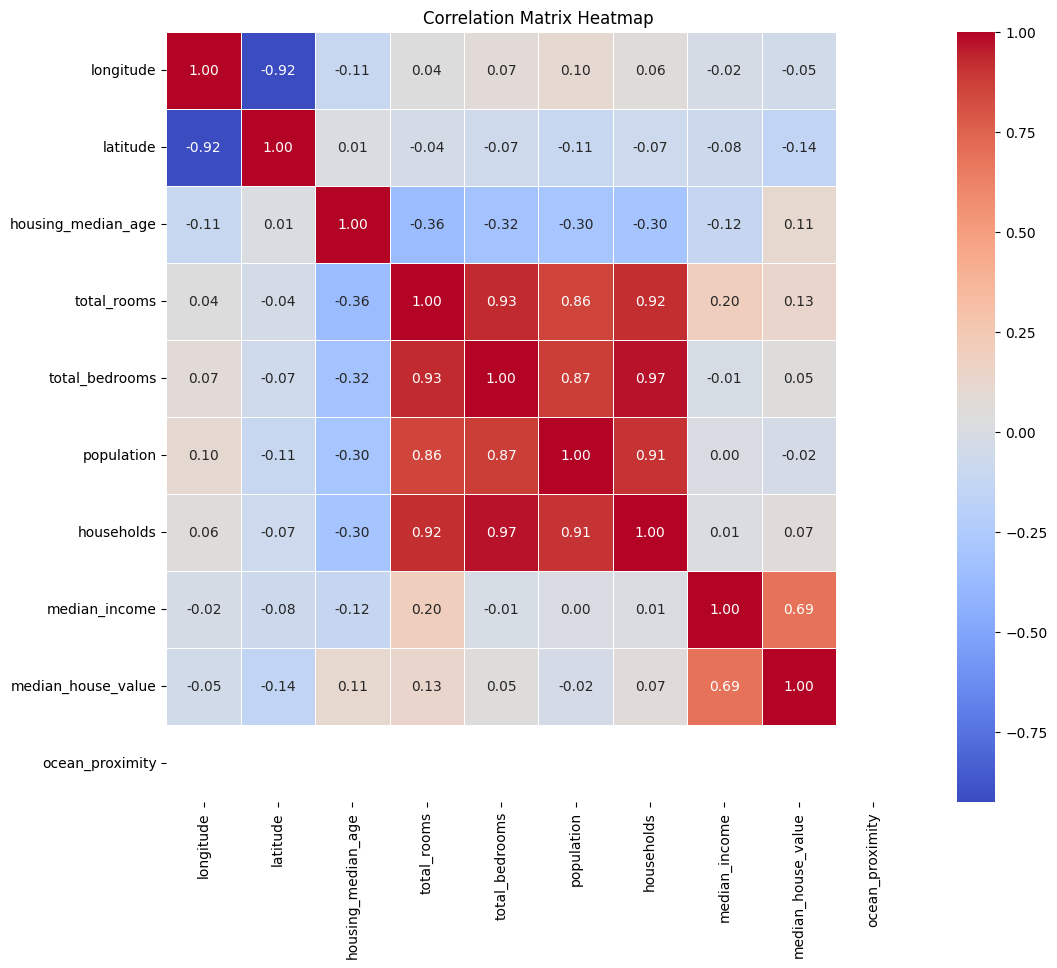

Top 5 features most correlated with the target variable:
total_rooms       0.361262
total_bedrooms    0.318998
households        0.302916
population        0.296244
median_income     0.119034
Name: housing_median_age, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()

    # Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

    # Identify the top 5 features correlated with the target variable
target_variable = 'housing_median_age'
if target_variable in correlation_matrix.columns:
     target_corr = correlation_matrix[target_variable].abs().sort_values(ascending=False)
     top_features = target_corr.drop(target_variable).head(5)

     print('Top 5 features most correlated with the target variable:')
     print(top_features)
else:
      print(f"Target variable '{target_variable}' not found in the DataFrame.")

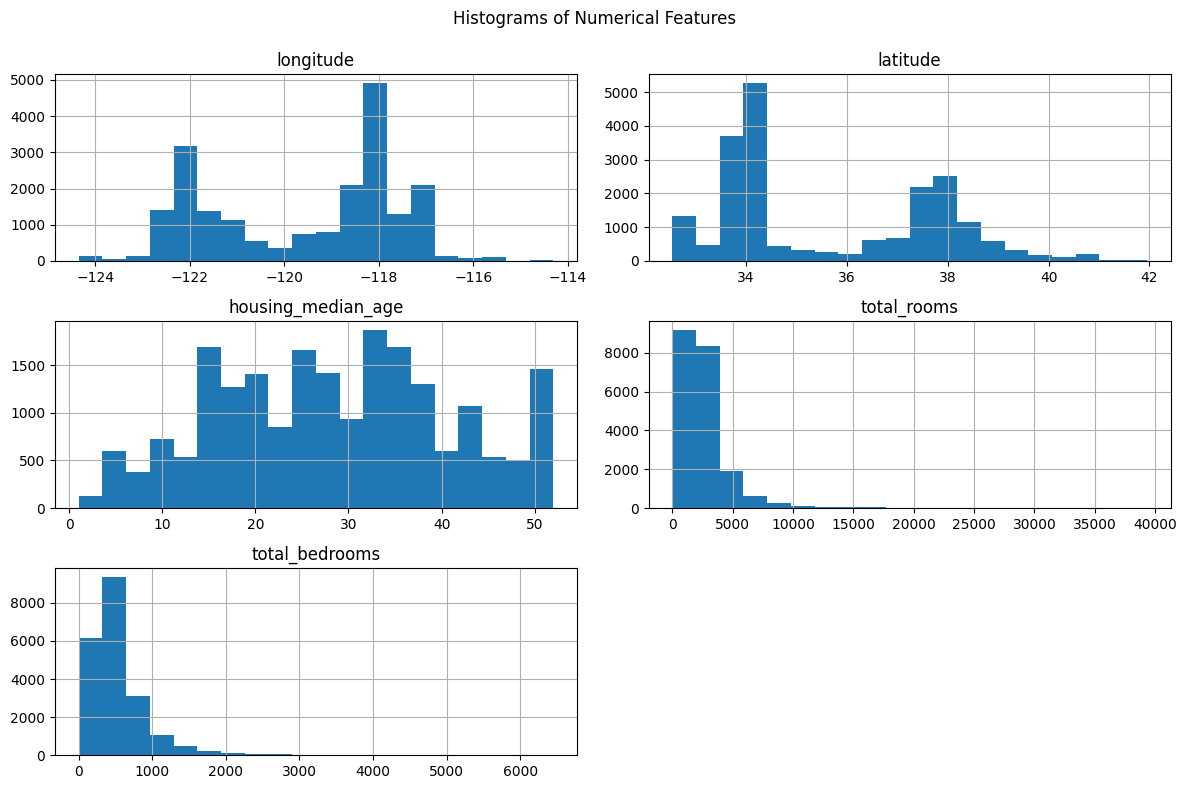

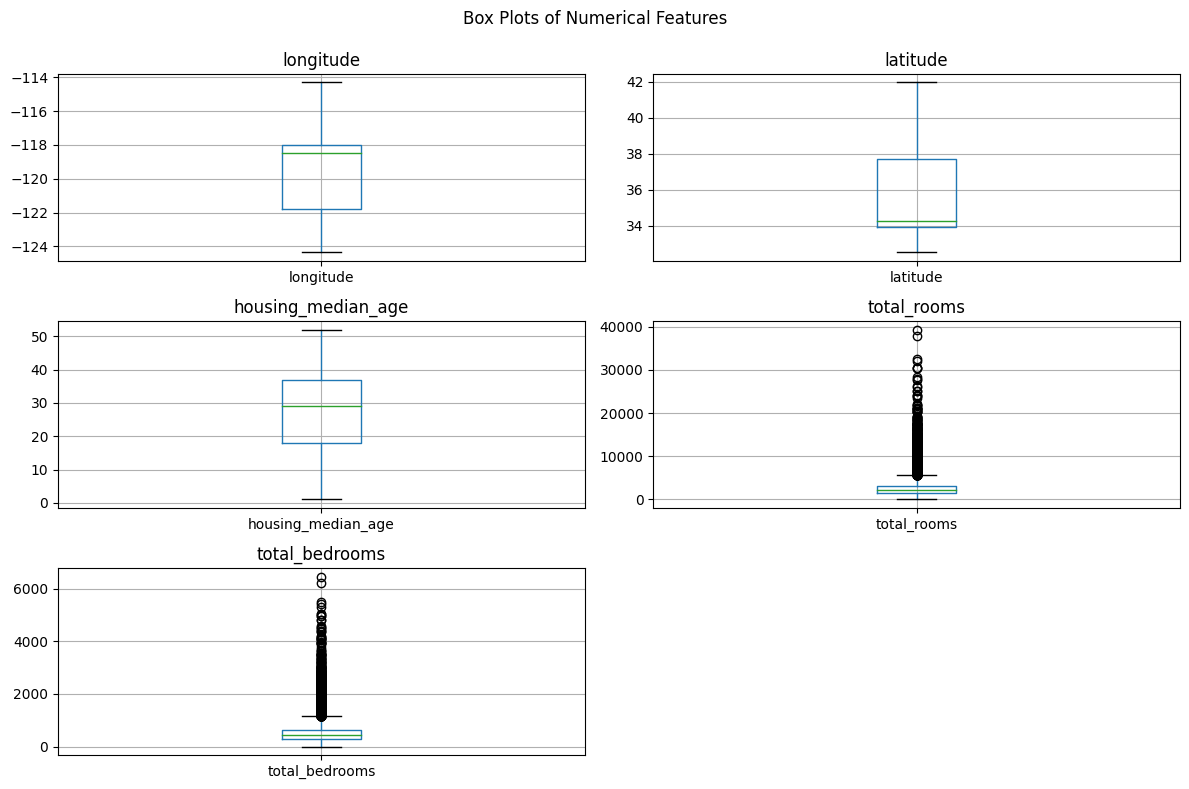

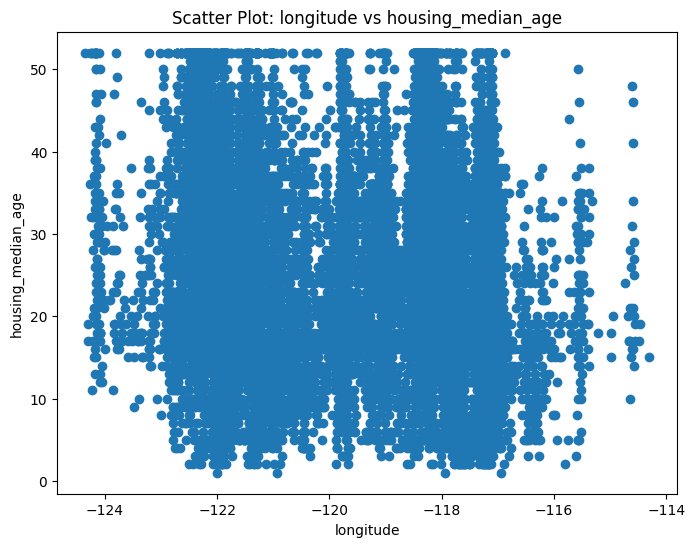

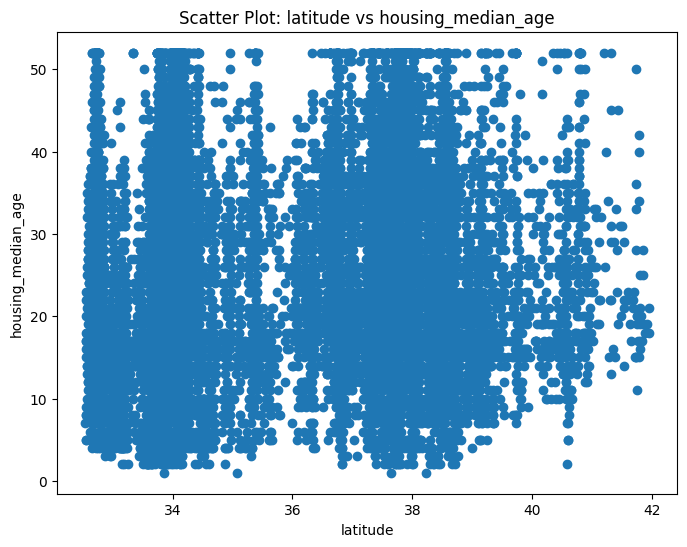

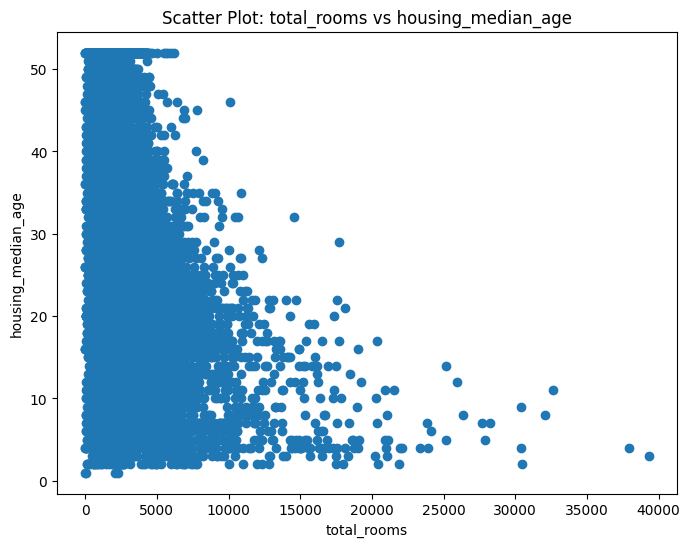

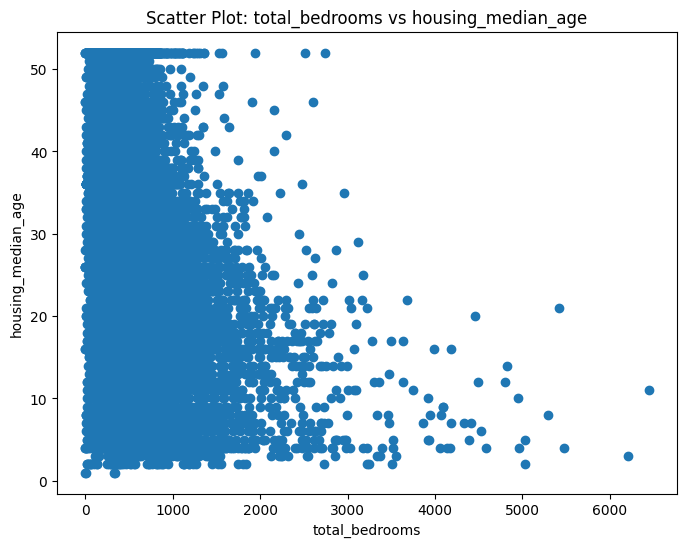

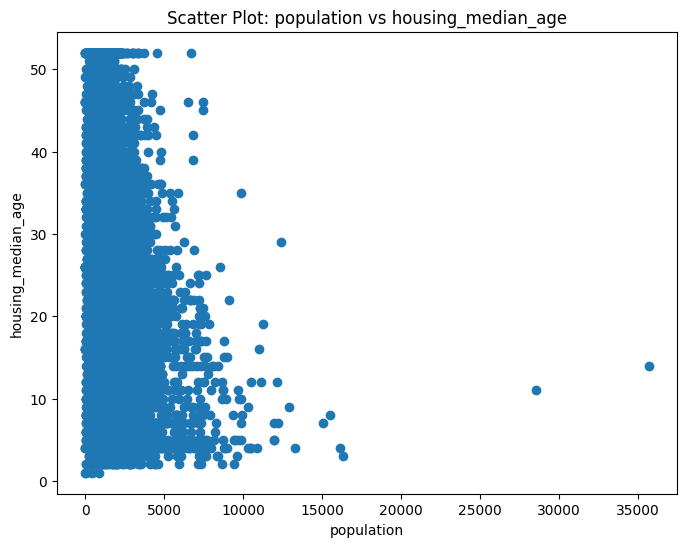

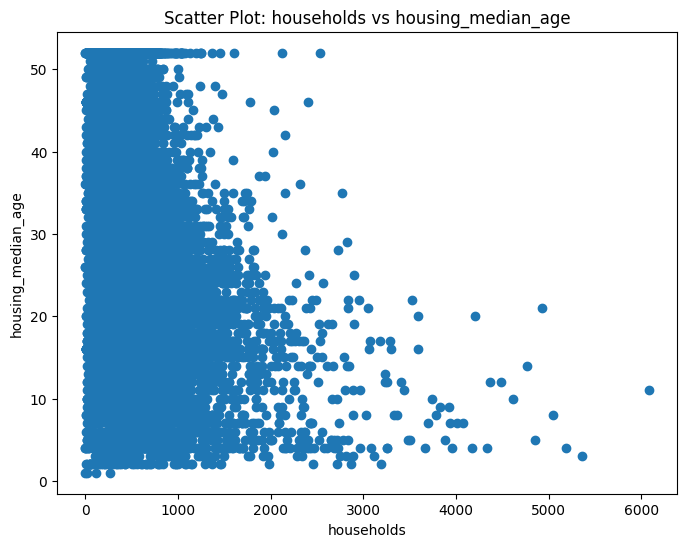

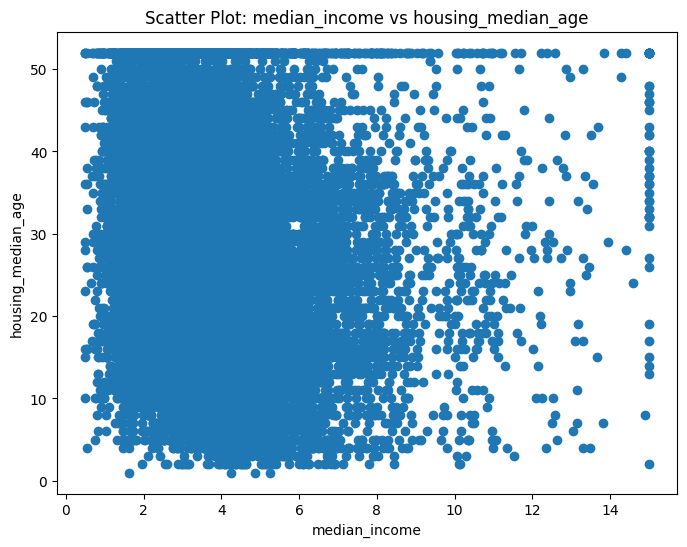

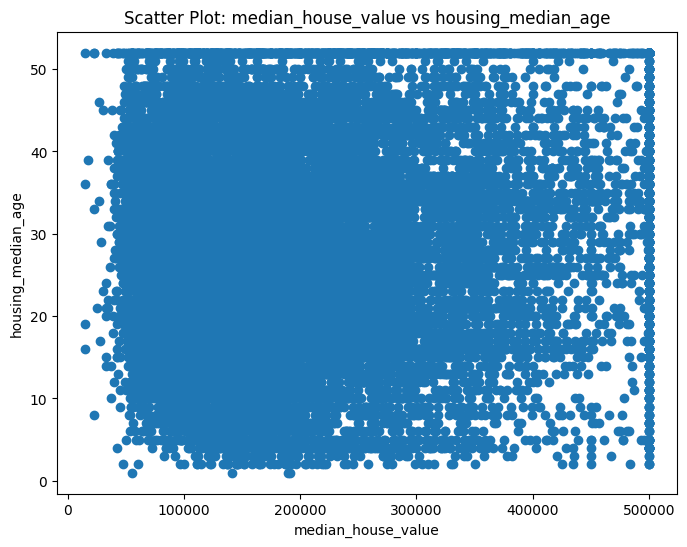

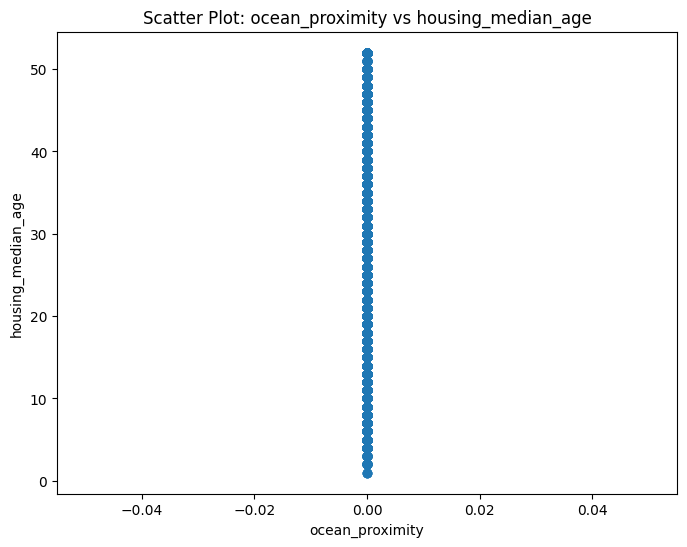

In [24]:
plt.figure(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')

for i, col in enumerate(numeric_cols[:5], 1):
      plt.subplot(3, 2, i)
      df[col].hist(bins=20)
      plt.title(col)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

    # Create box plots for the same 5 numerical features
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots of Numerical Features')

for i, col in enumerate(numeric_cols[:5], 1):
      plt.subplot(3, 2, i)
      df.boxplot(column=col)
      plt.title(col)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

    # Visualize the relationship between the target variable and key features
target_variable = 'housing_median_age'  # Change this to your actual target variable name

if target_variable in df.columns:
      # Scatter plot for continuous features
      for col in numeric_cols:
          if col != target_variable:
                plt.figure(figsize=(8, 6))
                plt.scatter(df[col], df[target_variable])
                plt.xlabel(col)
                plt.ylabel(target_variable)
                plt.title(f'Scatter Plot: {col} vs {target_variable}')
                plt.show()

        # Bar chart for categorical features
      for col in df.columns:
            if col != target_variable and col not in numeric_cols:
                plt.figure(figsize=(10, 6))
                df.groupby(col)[target_variable].mean().plot(kind='bar')
                plt.xlabel(col)
                plt.ylabel(f'Mean of {target_variable}')
                plt.title(f'Bar Chart: Mean {target_variable} by {col}')
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
else:
        print(f"Target variable '{target_variable}' not found in the DataFrame.")

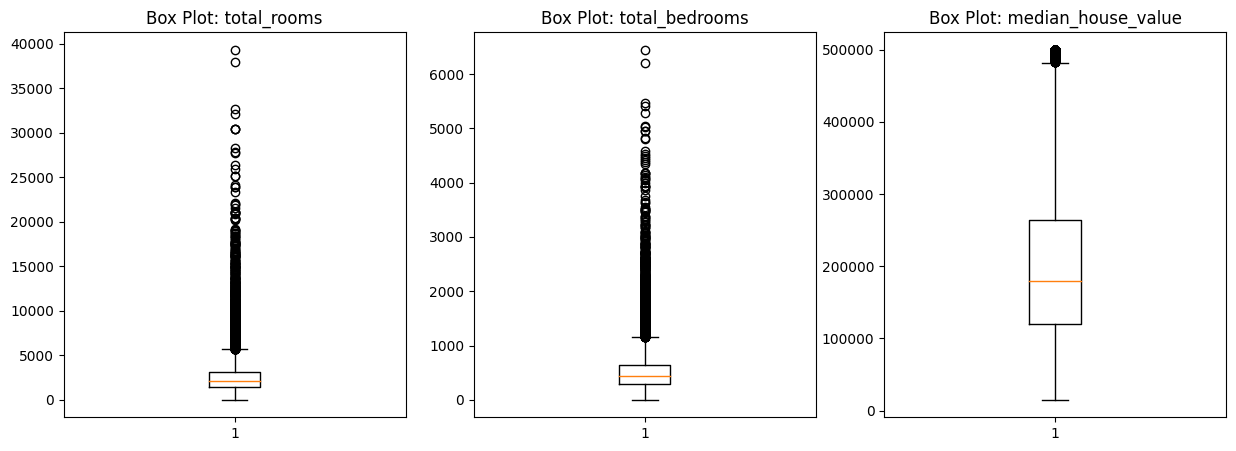

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for total_rooms
ax1.boxplot(df['total_rooms'])
ax1.set_title('Box Plot: total_rooms')

# Box plot for total_bedrooms
ax2.boxplot(df['total_bedrooms'])
ax2.set_title('Box Plot: total_bedrooms')

ax3.boxplot(df['median_house_value'])
ax3.set_title('Box Plot: median_house_value')

plt.show()

In [27]:
# Removing outliers based on a threshold (e.g., 1.5 times the interquartile range)
q1 = df['total_rooms'].quantile(0.25)
q3 = df['total_rooms'].quantile(0.75)
iqr = q3 - q1
threshold = 1.5 * iqr

outliers = df[(df['total_rooms'] < q1 - threshold) | (df['total_rooms'] > q3 + threshold)].index
df = df.drop(outliers)

In [28]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0


In [29]:
# Imputing outliers using median
median_total_rooms = df['total_rooms'].median()
df['total_rooms'] = df['total_rooms'].fillna(median_total_rooms)

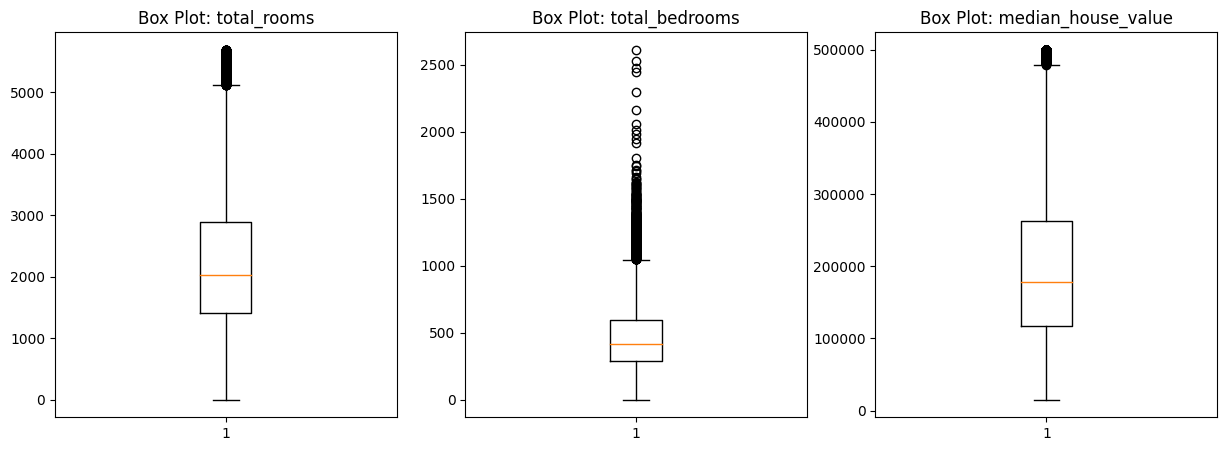

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Box plot for total_rooms
ax1.boxplot(df['total_rooms'])
ax1.set_title('Box Plot: total_rooms')

# Box plot for total_bedrooms
ax2.boxplot(df['total_bedrooms'])
ax2.set_title('Box Plot: total_bedrooms')

ax3.boxplot(df['median_house_value'])
ax3.set_title('Box Plot: median_house_value')

plt.show()

In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv('housing.csv')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# 1. Frequency distribution for the 'ocean_proximity' column
ocean_proximity_counts = df['ocean_proximity'].value_counts()
print("Frequency Distribution for 'ocean_proximity':")
print(ocean_proximity_counts)

# 2. Frequency distribution for 'housing_median_age' treated as categorical
# Create bins for housing_median_age
bins = [0, 20, 40, 60, 80, 100]  # Define your bins
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']  # Define labels for the bins
df['age_category'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels, right=False)

# Calculate frequency distribution for the new age_category column
age_category_counts = df['age_category'].value_counts()
print("\nFrequency Distribution for 'housing_median_age' (Categorized):")
print(age_category_counts)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Frequency Distribution for 'ocean_proximity':
ocean_proximity
<1H OCEAN    

In [32]:
import pandas as pd

# Load the dataset
df = pd.read_csv('housing.csv')

# Select the numerical columns of interest
columns_of_interest = ['total_rooms', 'total_bedrooms', 'median_house_value']

# Initialize a dictionary to store the results
statistics = {}

# Calculate mean, median, and mode for each column
for col in columns_of_interest:
    mean_value = df[col].mean()
    median_value = df[col].median()
    mode_value = df[col].mode()[0]  # mode() returns a Series, take the first value

    # Store the results in the dictionary
    statistics[col] = {
        'Mean': mean_value,
        'Median': median_value,
        'Mode': mode_value
    }

# Display the results
for col, stats in statistics.items():
    print(f"Statistics for '{col}':")
    print(f"  Mean: {stats['Mean']}")
    print(f"  Median: {stats['Median']}")
    print(f"  Mode: {stats['Mode']}\n")

Statistics for 'total_rooms':
  Mean: 2635.7630813953488
  Median: 2127.0
  Mode: 1527.0

Statistics for 'total_bedrooms':
  Mean: 537.8705525375618
  Median: 435.0
  Mode: 280.0

Statistics for 'median_house_value':
  Mean: 206855.81690891474
  Median: 179700.0
  Mode: 500001.0



In [33]:
import pandas as pd

# Load the dataset
df = pd.read_csv('housing.csv')

# Select the numerical columns of interest
columns_of_interest = ['total_rooms', 'total_bedrooms', 'median_house_value']

# Initialize a dictionary to store the results
variability_stats = {}

# Calculate standard deviation and interquartile range for each column
for col in columns_of_interest:
    std_dev = df[col].std()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Store the results in the dictionary
    variability_stats[col] = {
        'Standard Deviation': std_dev,
        'IQR': iqr
    }

# Display the results
for col, stats in variability_stats.items():
    print(f"Variability for '{col}':")
    print(f"  Standard Deviation: {stats['Standard Deviation']:.2f}")
    print(f"  Interquartile Range (IQR): {stats['IQR']:.2f}\n")

Variability for 'total_rooms':
  Standard Deviation: 2181.62
  Interquartile Range (IQR): 1700.25

Variability for 'total_bedrooms':
  Standard Deviation: 421.39
  Interquartile Range (IQR): 351.00

Variability for 'median_house_value':
  Standard Deviation: 115395.62
  Interquartile Range (IQR): 145125.00



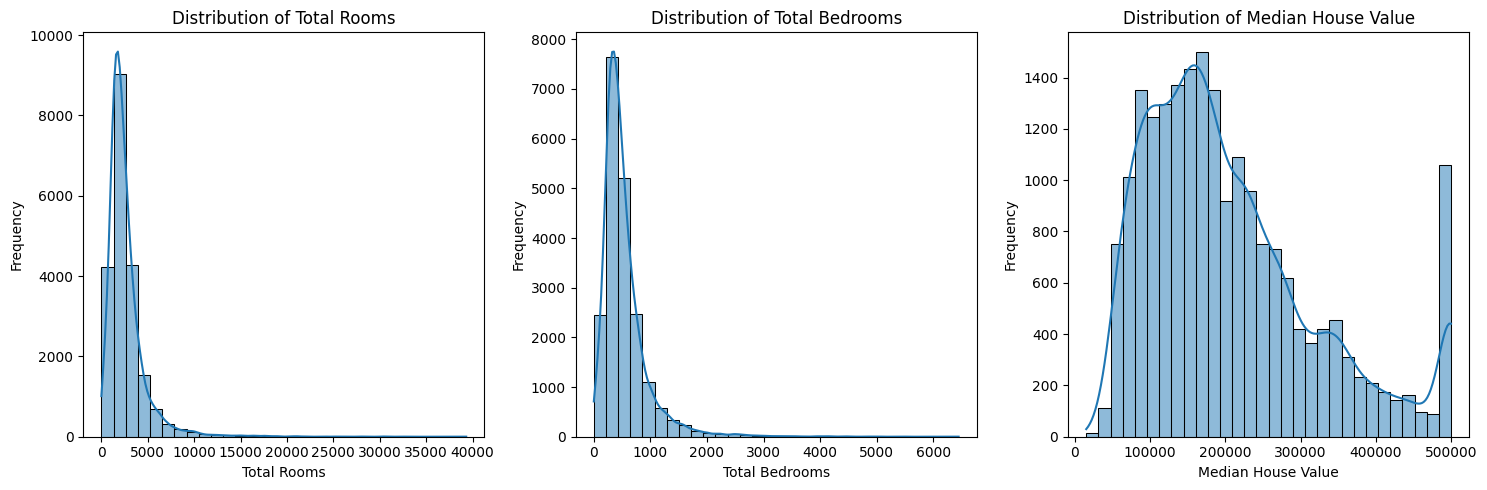

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('housing.csv')

# Set up the figure for histograms
plt.figure(figsize=(15, 5))

# Histogram for total_rooms
plt.subplot(1, 3, 1)
sns.histplot(df['total_rooms'], bins=30, kde=True)
plt.title('Distribution of Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Frequency')

# Histogram for total_bedrooms
plt.subplot(1, 3, 2)
sns.histplot(df['total_bedrooms'], bins=30, kde=True)
plt.title('Distribution of Total Bedrooms')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')

# Histogram for median_house_value
plt.subplot(1, 3, 3)
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Set up the figure for box plots
plt.figure(figsize=(15, 5))

# Box plot

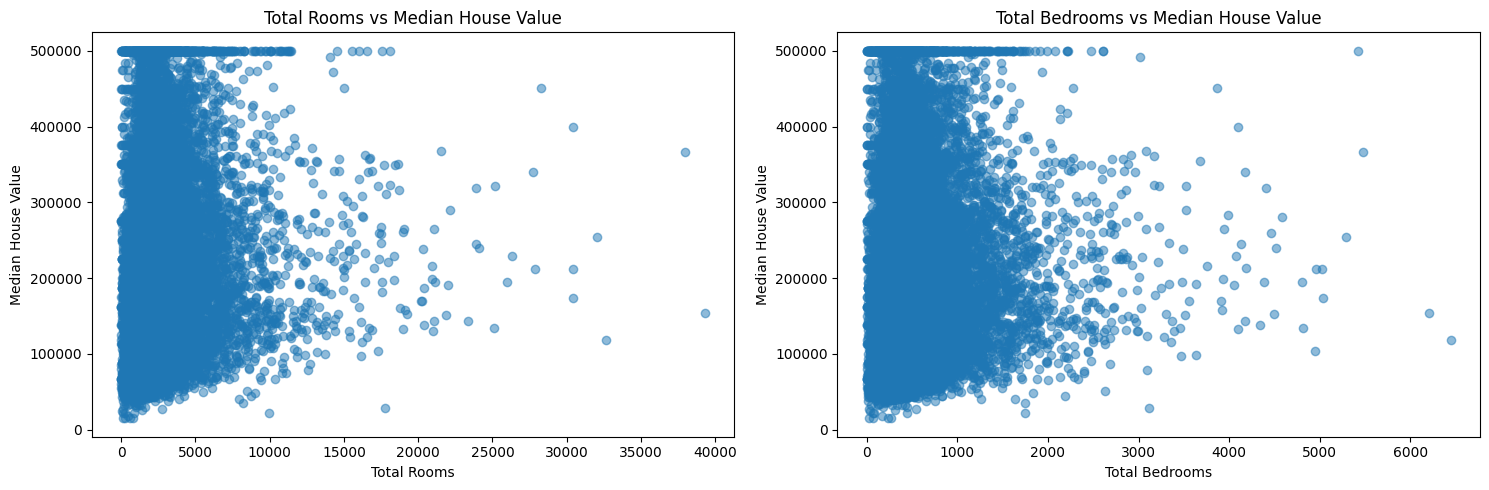

In [36]:
# Set up the figure for scatter plots
plt.figure(figsize=(15, 5))

# Scatter plot for total_rooms vs median_house_value
plt.subplot(1, 2, 1)
plt.scatter(df['total_rooms'], df['median_house_value'], alpha=0.5)
plt.title('Total Rooms vs Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value')

# Scatter plot for total_bedrooms vs median_house_value
plt.subplot(1, 2, 2)
plt.scatter(df['total_bedrooms'], df['median_house_value'], alpha=0.5)
plt.title('Total Bedrooms vs Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value')

plt.tight_layout()
plt.show()



**Inferneces:**

* All features follow almost normal distribution.
* All data contain many number of outliers.
* Some data features like total_doors seem irrelevant and the dataset needs to be revised via feature engineering.